In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import graphviz #visusalize the decision tree


In [2]:
#pip install graphviz

In [3]:
#conda install python-graphviz

In [4]:
df = pd.read_csv('df_final_chapter_1.csv')
#df.columns.tolist()

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
items_to_remove = ['ID', 'SEX',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',  'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university']

In [7]:
features = df.columns.tolist()

In [8]:
feature_response = []
for item in features:
    if item not in items_to_remove:
        feature_response.append(item)
        
feature_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df[feature_response[:-1]].columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[feature_response[:-1]].values, df['default payment next month'].values, test_size= 0.2, random_state= 24)

In [12]:
from sklearn import tree

In [13]:
dt = tree.DecisionTreeClassifier(max_depth= 2)

In [14]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
dot_data = tree.export_graphviz(dt,
                                out_file = None,
                                filled = True,
                               rounded = True,
                               feature_names = feature_response[:-1],
                               proportion = True,
                               class_names = [ 'Not defaulted','Defaulted']
                       
)

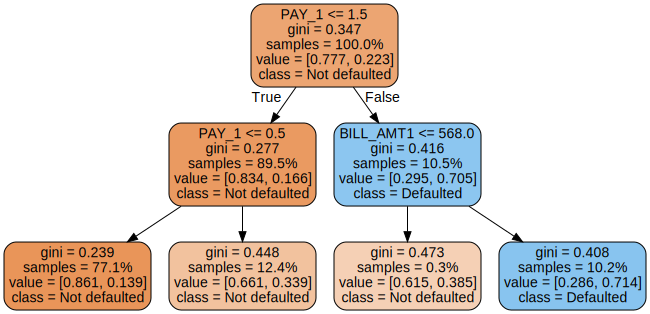

In [16]:
graph  = graphviz.Source(dot_data)
graph

In [17]:
feature_response[:-1].index('PAY_1')

4

In [18]:
x_train.shape

(21331, 17)

In [19]:
((sum(x_train[:,4] <= 1.5 )/x_train.shape[0])*100).round(1)

89.5

In [20]:
y_train.mean()

0.223102526838873

In [21]:
pm0 = np.linspace(0.01,0.99,99)
pm1 = 1 - pm0

In [22]:
misclassification_rate = np.minimum(pm0,pm1)

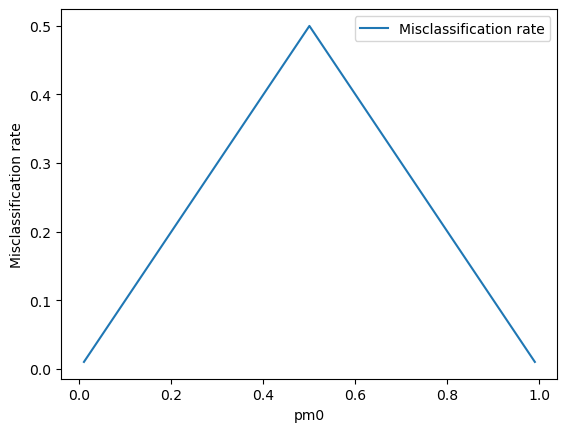

In [23]:
plt.plot(pm0, misclassification_rate, label = 'Misclassification rate')
plt.xlabel('pm0')
plt.ylabel('Misclassification rate')
plt.legend()

In [24]:
## as negative class increases, the misclassification increases until 0.5


In [25]:
gini = pm0*(1-pm0) + pm1*(1-pm1)
cross_entropy = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

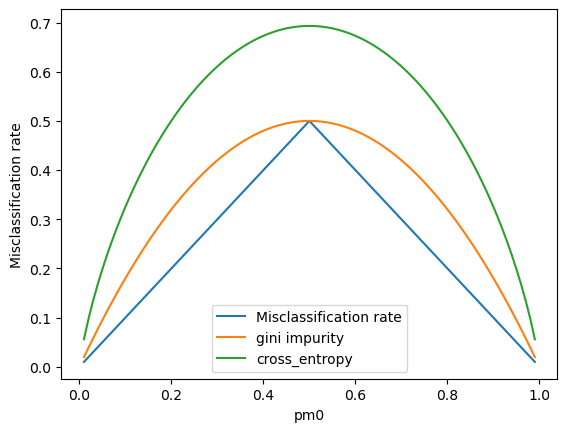

In [26]:
plt.plot(pm0, misclassification_rate, label = 'Misclassification rate')
plt.plot(pm0, gini, label = 'gini impurity')
plt.plot(pm0,cross_entropy, label = 'cross_entropy')
plt.xlabel('pm0')
plt.ylabel('Misclassification rate')
plt.legend()

In [27]:
from sklearn.datasets import make_circles

In [28]:
x_cir, y_cir = make_circles(n_samples= 333, shuffle=True, random_state= 1, factor=0.4, noise = 0.1)

In [29]:
from matplotlib.colors import ListedColormap

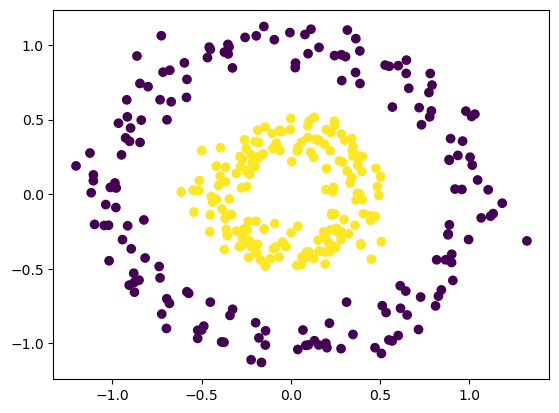

In [30]:
plt.scatter(x_cir[:,0], x_cir[:,1], c = y_cir)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
x_train.shape

(21331, 17)

In [38]:
# for the gridsearch input

params = {'max_depth':[1,2,4,6,8,10,12]}

In [39]:
# instantiate the GridSearchCV for cross validation

cv = GridSearchCV(dt, params,scoring= 'roc_auc',n_jobs=None, refit=True, cv = 4, verbose = 1, \
                  pre_dispatch=None, error_score=np.nan, return_train_score=True   )


In [40]:
cv.fit(x_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [44]:
# create a dataframe to visualize the results
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.020459,0.004664,0.000993,0.000993,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.036108,0.004869,0.002768,0.003297,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.071614,0.007656,0.003534,0.002613,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.102966,0.003585,0.003781,0.002477,6,{'max_depth': 6},0.744848,0.746825,0.751932,0.741356,0.746240,0.003825,1,0.782202,0.780044,0.775228,0.774776,0.778062,0.003158
4,0.126968,0.013506,0.001004,0.001004,8,{'max_depth': 8},0.730029,0.733488,0.749597,0.728973,0.735522,0.008296,3,0.811811,0.808245,0.803415,0.802368,0.806460,0.003803
5,0.148945,0.003502,0.003035,0.000656,10,{'max_depth': 10},0.707979,0.699952,0.718428,0.714838,0.710299,0.007056,4,0.848756,0.854468,0.841187,0.836461,0.845218,0.006910
6,0.170558,0.003614,0.001294,0.001329,12,{'max_depth': 12},0.674800,0.656411,0.674334,0.685006,0.672638,0.010294,6,0.887673,0.903596,0.885533,0.875701,0.888125,0.010008


In [45]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

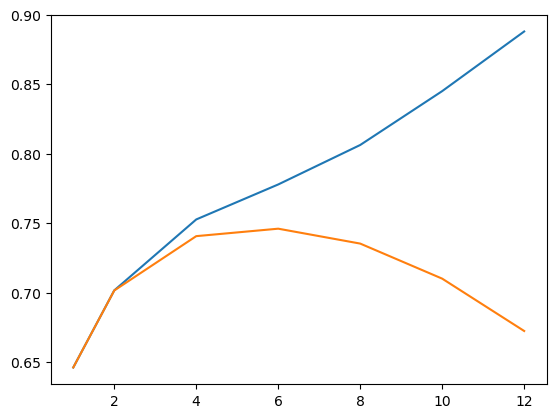

In [47]:
plt.plot(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'])
plt.plot(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'])

Text(0, 0.5, 'ROC AUC')

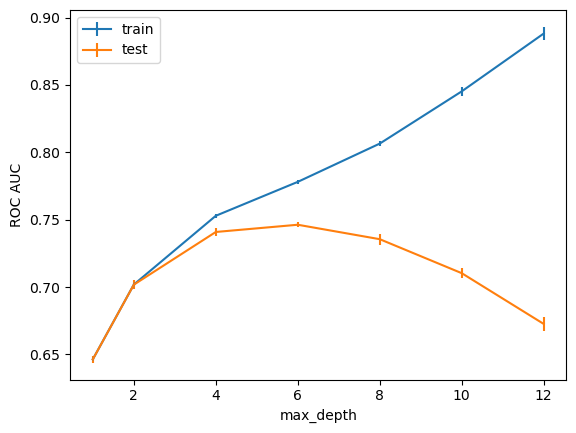

In [53]:
# with error bar --> yerr
plt.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_train_score'],\
         yerr = cv_results_df['std_train_score']/np.sqrt(4), label = 'train')



plt.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'],\
         yerr = cv_results_df['std_test_score']/np.sqrt(4), label = 'test')

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

# Exercise 5.03: Fitting a Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators= 10,
                            criterion= 'gini',
                            max_depth= 3,
                            min_samples_split=3,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='auto',
                            max_leaf_nodes= None,
                            min_impurity_decrease=0.0,
                            bootstrap= True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=4,
                            verbose=0,
                            warm_start=False,
                            class_weight=None
)

In [57]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [58]:
cv_rf_ex = GridSearchCV(rf, param_grid= rf_params_ex, scoring = 'roc_auc', n_jobs = None,\
                       refit = True, cv =4, verbose = 1, pre_dispatch= None, error_score=np.nan,
                        return_train_score=True
                       )

In [60]:
cv_rf_ex.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, min_samples_split=3,
                                              n_estimators=10, random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [61]:
cv_rf_ex_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [64]:
cv_rf_ex_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [62]:
cv_rf_ex_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.097584,0.003305,0.006017,0.000736,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.200021,0.014895,0.009745,0.001927,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.308258,0.012403,0.013273,0.000829,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.387666,0.006500,0.015503,0.000495,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.462569,0.013510,0.019243,0.001669,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,0.561010,0.016545,0.023484,0.001786,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,0.656942,0.014178,0.025996,0.000702,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,0.744176,0.008029,0.029241,0.001770,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,0.894825,0.031059,0.033457,0.001595,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,0.939008,0.010014,0.036282,0.001614,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


Text(0, 0.5, 'ROC AUC')

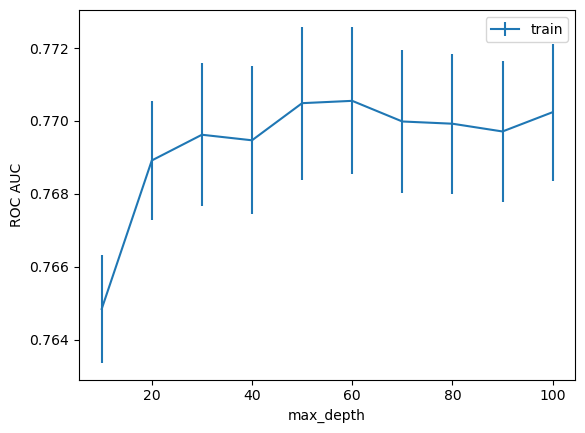

In [66]:
plt.errorbar(cv_rf_ex_df['param_n_estimators'], cv_rf_ex_df['mean_train_score'],\
         yerr = cv_rf_ex_df['std_train_score']/np.sqrt(4), label = 'train')



#plt.errorbar(cv_rf_ex_df['param_n_estimators'], cv_rf_ex_df['mean_test_score'],\
        # yerr = cv_rf_ex_df['std_test_score']/np.sqrt(4), label = 'test')

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

Text(0, 0.5, 'ROC AUC')

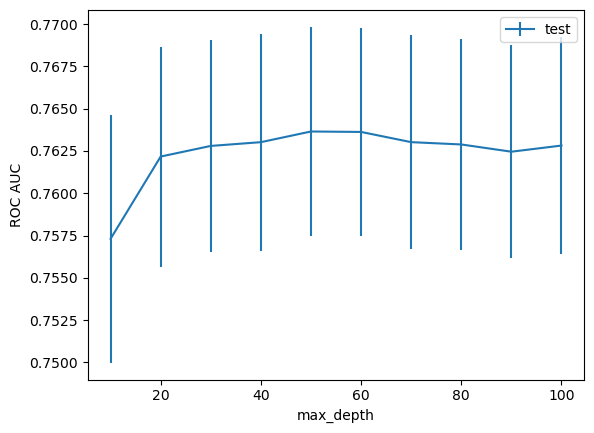

In [71]:
plt.errorbar(cv_rf_ex_df['param_n_estimators'], cv_rf_ex_df['mean_test_score'],\
         yerr = cv_rf_ex_df['std_test_score']/np.sqrt(4), label = 'test')

plt.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [72]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [73]:
feat_imp_df = pd.DataFrame({'Importance': cv_rf_ex.best_estimator_.feature_importances_}, index = feature_response[:-1])

In [74]:
 cv_rf_ex.best_estimator_.feature_importances_

array([7.92654119e-02, 1.62965540e-03, 1.69783800e-04, 4.59032779e-04,
       6.09608673e-01, 8.57370984e-03, 2.24215568e-02, 1.33207776e-02,
       1.34543733e-02, 1.12637065e-02, 1.42930960e-02, 9.41230762e-02,
       3.53933835e-02, 4.70668194e-02, 2.11638814e-02, 1.59618676e-02,
       1.18311949e-02])

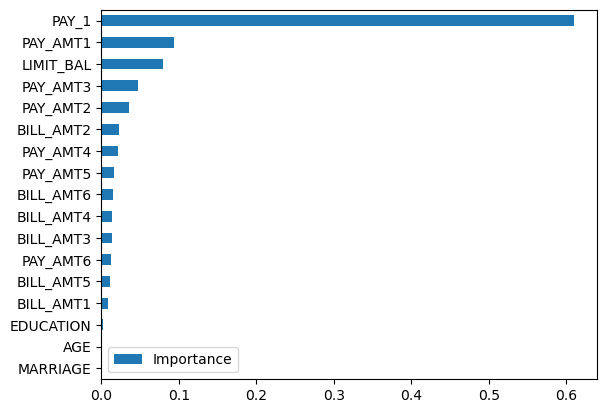

In [87]:
feat_imp_df.sort_values('Importance', ascending = True).plot.barh()
plt.show()

In [90]:
xx_ex, yy_ex = np.meshgrid(range(5), range(5))

In [171]:
xx_ex

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [91]:
z_ex = np.arange(1,17).reshape(4,4)

Text(0, 0.5, 'y_vals')

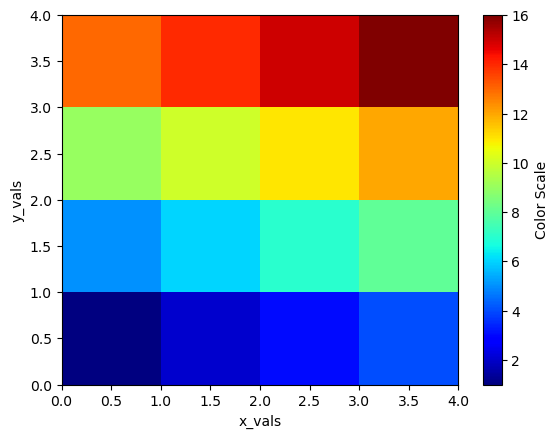

In [94]:
ax = plt.axes()

pcolor_ex = ax.pcolormesh(xx_ex, yy_ex, z_ex, cmap = plt.cm.jet)
plt.colorbar(pcolor_ex, label ='Color Scale')
ax.set_xlabel('x_vals')
ax.set_ylabel('y_vals')

# Activity 5.01 Cross-Validation Grid Search with Random Forest

In [125]:
params_act = {'max_depth':[3,6,9,12], 'n_estimators':[10,50,100,200]}

In [178]:
rf_2 = RandomForestClassifier(n_estimators= 10,
                            criterion= 'gini',
                            max_depth= 3,
                            min_samples_split=3,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='auto',
                            max_leaf_nodes= None,
                            min_impurity_decrease=0.0,
                            bootstrap= True,
                            oob_score=False,
                            n_jobs=-1,
                            random_state=4,
                            verbose=0,
                            warm_start=False,
                            class_weight=None
)

In [179]:
cv_rf_act = GridSearchCV(rf_2, param_grid=params_act, scoring = 'roc_auc', n_jobs= None,\
                         refit = True, cv =4, verbose = 2, pre_dispatch= None, error_score=np.nan,
                        return_train_score=True
                       )

In [180]:
cv_rf_act_results = cv_rf_act.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   3.3s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_es

In [202]:
cv_rf_act_results_df = pd.DataFrame(cv_rf_act_results.cv_results_)
cv_rf_act_results_df_extracted = cv_rf_act_results_df[['param_max_depth','param_n_estimators','mean_test_score','mean_train_score']]
cv_rf_act_results_df_extracted

,param_max_depth,param_n_estimators,mean_test_score,mean_train_score
0,3,10,0.757308,0.764841
1,3,50,0.763651,0.770486
2,3,100,0.762819,0.770238
3,3,200,0.762471,0.770382
4,6,10,0.765727,0.795410
5,6,50,0.773123,0.803181
6,6,100,0.773699,0.804580
7,6,200,0.773732,0.804956
8,9,10,0.765802,0.852442
9,9,50,0.774861,0.868168


In [203]:
cv_rf_act_results_df_extracted['mean_test_score']

0     0.757308
1     0.763651
2     0.762819
3     0.762471
4     0.765727
5     0.773123
6     0.773699
7     0.773732
8     0.765802
9     0.774861
10    0.776228
11    0.776431
12    0.757226
13    0.771006
14    0.772851
15    0.774684
Name: mean_test_score, dtype: float64

In [204]:
xx_act, yy_act = np.meshgrid([3,6,9,12],[10,50,100,200] )

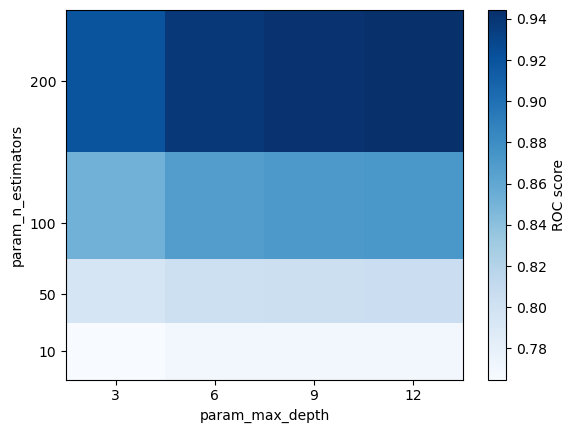

In [205]:
ax = plt.axes()

pcolor_act = ax.pcolormesh(xx_act,yy_act,\
                           cv_rf_act_results_df_extracted['mean_train_score'].values.reshape(4,4),cmap = plt.cm.Blues)
plt.colorbar(pcolor_act, label = 'ROC score')

ax.set_xlabel('param_max_depth')
ax.set_ylabel('param_n_estimators')
ax.set_xticks([3,6,9,12])
ax.set_yticks([10,50,100,200])

In [207]:
## the ROC increases wiht no of tress and the depth

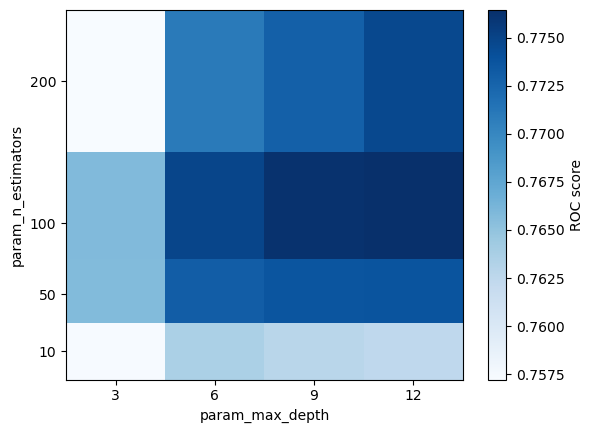

In [206]:
ax = plt.axes()

pcolor_act = ax.pcolormesh(xx_act,yy_act,\
                           cv_rf_act_results_df_extracted['mean_test_score'].values.reshape(4,4),cmap = plt.cm.Blues)
plt.colorbar(pcolor_act, label = 'ROC score')

ax.set_xlabel('param_max_depth')
ax.set_ylabel('param_n_estimators')
ax.set_xticks([3,6,9,12])
ax.set_yticks([10,50,100,200])


### for me  200 trees and 12 depth however thea answer from the book is different

In [219]:
cv_rf_act.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [228]:
select = cv_rf_act_results_df_extracted.loc[cv_rf_act_results_df_extracted['param_n_estimators'] ==200]
                                             
select = select.loc[select['param_max_depth'] == 9]

select 

,param_max_depth,param_n_estimators,mean_test_score,mean_train_score
11,9,200,0.776431,0.872487


In [229]:
select = cv_rf_act_results_df_extracted.loc[cv_rf_act_results_df_extracted['param_n_estimators'] ==200 \
                                            & cv_rf_act_results_df_extracted['param_max_depth'] ==9 ]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [239]:
select = cv_rf_act_results_df_extracted.loc[(cv_rf_act_results_df_extracted['param_n_estimators'] ==200) & \
                                            (cv_rf_act_results_df_extracted['param_max_depth'] == 9)]['mean_test_score']
select

11    0.776431
Name: mean_test_score, dtype: float64

In [245]:
np.array(select)[0]*100

77.64313422494897

In [ ]:
## https://datatofish.com/select-rows-pandas-dataframe/